#### Análisis Exploratorio y Curación de Datos:

# Laboratorio: Limpiar un set de datos con pandas

<p><em>Consigna:</em></p>
<p>Limpiar un set de datos con pandas</p>
<ul>
<li>Un set de datos que tengan permisos para compartir con nosotros</li>
<li>M&aacute;s de 100000 registros</li>
<li>M&aacute;s de 20 columnas</li>
<li>Con datos con cadenas, n&uacute;meros, fechas, y categor&iacute;as</li>
</ul>
<p>

<ol>
    <li>Importando los datos</li>
        <ol>
            <li> Verificar si no hay problemas en la importación Habilitar chequeos al importar </li>
            <li> Asegurar de tener ids/claves únicas Chequear que no hay datos duplicados </li>
            <li> Despersonalizar datos y guardarlos en un nuevo archivo</li>
            <li> Nunca modificar los datos crudos u originales</li>
        </ol>
    <li>Pasos necesarios</li>
        <ol>
            <li>Etiquetas de variables/columnas: no usar caracteres especiales Verificar que no haya problemas de codificación/encoding </li>
            <li> Tratar valores faltantes Quitar o imputar</li>
            <li> Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas</li>
            <li> No cambiar los nombres de las variables de la fuente de origen</li>
            <li> Verificar la consistencia de las variables
Aplicar reglas de integridad</li>
            <li> Identificar y documentar valores atípicos/outliers
Calcular estadísticos</li>
            <li> Evaluar cómo comprimir los datos para su almacenamiento más eficiente</li>
            <li> Guardar el set de datos con un nombre informativo.</li>
        </ol>
    <li> Pasos deseables</li>
    <ol>
        <li> Ordenar variables/columnas si es posible – primero ID, luego en el mismo orden que la fuente</li>
        <li> Quitar variables/columnas que no tienen información a analizar</li>
        <li> Renombrar variables de grillas</li>
        <li> Categorizar resultados en “Otros”
Si tiene un campo de texto libre asociado, codificar en nuevos valores de la variable
categórica asociada. Revisar fuzzyness.</li>
        <li> Agregar metadata a los datos: cuando y como fueron obtenidos, limpieza realizada,
asunciones, etc
Vincular con etiquetas del código fuente y los datos. Al menos incluir un README.</li>
    <ol>
</ol>
</p>

---

# Limpieza de Set de Datos Propio:

In [1]:
# Inicialmente cargamos las librerías a utilizar:
import os.path as path
import zipfile
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pylab import rcParams
rcParams['figure.figsize'] = 18, 4

# Importamos los datos:

In [2]:
# Nota: El dataset se encuentra comprimido por un tema de volumen. 
# Esta rutina chequea su existencia y lo extrae en caso de no existir. 
dataset_filename = '../datos/datos-anonimizados-clientes.csv'

if path.isfile(dataset_filename) == False:
    zip = zipfile.ZipFile('../datos/datos-anonimizados-clientes.zip')
    zip.extractall('../datos/')
    print('Dataset extraido. Continuamos.')
else:
    print('El dataset existe. Continuamos.')


El dataset existe. Continuamos.


In [3]:
# set seed for reproducibility
np.random.seed(0)

In [4]:
# No especificamos columna indice, porque no tenemos una columna con datos unicos
ventas_df = pd.read_csv(dataset_filename)

/Users/facundo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,15,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Para salvar el warning, definiremos los tipos de datos de cada columna:

In [5]:
ventas_df_dtype={'CODIGO_CLIENTE': object,
 'RAZON_SOCIAL':  object,
 'CUIT': object,
 'CATEGORIA_IVA': object,
 'GRUPO_CANAL': object,
 'CANAL': object,
 'SUBCANAL': object,
 'APERTURA_ADICIONAL': object,
 'CATEGORIA': object,
 'ZONA': object,
 'ZONA_REPARTO': object,
 'CONDICION_VENTA': object,
 'CREDITO_MAXIMO': np.dtype('f'),
 'CREDITO_MONEDA': object,
 'LISTA_PRECIOS': object,
 'AGENTE_RETENCION': np.dtype('?'),
 'DIAS_TOLERANCIA_COBRO': np.dtype('i'),
 'GRUPO': object,
 'SOCIEDAD_JURIDICA': object,
 'ESTADO': object,
 'MOTIVO_ESTADO': object,
 'ESQUEMA_COMERCIAL': object,
 'DIRECCION_CALLE': object,
 'DIRECCION_NUMERO': object,
 'CODIGO_POSTAL': object,
 'LATITUD': np.dtype('f'),
 'LONGITUD': np.dtype('f') ,
 'DIRECCION_PRINCIPAL': object,
 'FACTURA_CODIGO': object,
 'FACTURA_NUMERO': np.dtype('i'),
 'FACTURA_SUCURSAL': np.dtype('i'),
 'FACTURA_FECHA': object,
 'FACTURA_MONTO_TOTAL': np.dtype('f'),
 'FACTURA_COND_VENTA': object,
 'FACTURA_VENDEDOR': object,
 'CODIGO_ARTICULO': object,
 'DESCRIPCION': object,
 'AGRUPACION_1': object,
 'AGRUPACION_2': object,
 'AGRUPACION_3': object,
 'AGRUPACION_4': object,
 'AGRUPACION_5': object,
 'AGRUPACION_6': object,
 'CANTIDAD': np.dtype('d'),
 'UNIDAD_MEDIDA': object,
 'PRECIO_UNITARIO': np.dtype('d'),
 'PRECIO_TOTAL' : np.dtype('d')}


In [6]:
ventas_df = pd.read_csv("../datos/datos-anonimizados-clientes.csv",
                        dtype=ventas_df_dtype)

In [7]:
ventas_df.dtypes

Unnamed: 0                 int64
CODIGO_CLIENTE            object
RAZON_SOCIAL              object
CUIT                      object
CATEGORIA_IVA             object
GRUPO_CANAL               object
CANAL                     object
SUBCANAL                  object
APERTURA_ADICIONAL        object
CATEGORIA                 object
ZONA                      object
ZONA_REPARTO              object
CONDICION_VENTA           object
CREDITO_MAXIMO           float32
CREDITO_MONEDA            object
LISTA_PRECIOS             object
AGENTE_RETENCION            bool
DIAS_TOLERANCIA_COBRO      int32
GRUPO                     object
SOCIEDAD_JURIDICA         object
ESTADO                    object
MOTIVO_ESTADO             object
ESQUEMA_COMERCIAL         object
FACTURA_CODIGO            object
FACTURA_NUM_ID            object
FACTURA_SUCURSAL           int32
FACTURA_FECHA             object
FACTURA_MONTO_TOTAL      float32
FACTURA_COND_VENTA        object
FACTURA_VENDEDOR          object
CODIGO_ART

Obtenemos el tamaño del dataframe en filas y columnas:

In [8]:
display(HTML('<H3>NOTA: El set de datos posee {0:,.0f} filas por {1} columnas, lo cual lo hace adecuado para el ejercicio.</h3>'.format(len(ventas_df),len(ventas_df.columns))))

---

## Visualizamos el Dataframe:

In [9]:
ventas_df[:5]

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,091,034,101,003,021,001,12.0,UN,8.0380,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,...,012,302,402,012,126,001,6.0,UN,14.3429,104.13


In [10]:
# El codigo cliente no es único, usamos la columna indice para identificarla univocamente
if ventas_df['CODIGO_CLIENTE'].size == ventas_df['CODIGO_CLIENTE'].unique().size:
    print("CODIGO_CLIENTE Unique")
else:
    print("CODIGO_CLIENTE Not unique")
ventas_df.rename(columns={'Unnamed: 0':'indice'}, inplace=True)
if ventas_df['indice'].size == ventas_df['indice'].unique().size:
    print("indice Unique")
else:
    print("indice Not unique")

CODIGO_CLIENTE Not unique
indice Unique


In [11]:
# Eliminamos filas repetidas
len_orig = len(ventas_df)
ventas_df = ventas_df.drop_duplicates()
len_no_duplicates = len(ventas_df)

if len_orig == len_orig:
    print("No hay filas duplicadas!")

No hay filas duplicadas!


In [12]:
ventas_df.columns

Index(['indice', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

# Pasos necesarios:

#### Verificar Nombres de Columnas. 
Los nombres de las columnas fueron verificados al espeficar el tipo de datos y no contienen caracteres especiales.
La razón social es era la unica variable suceptible a contener caracteres especiales pero, se le aplicó la funcion para despersonalizar los nombres. 
La otra variable que puede llegar a tener caracteres especiales es ESQUEMA_COMERCIAL

In [13]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

db_copy = ventas_df
db_copy['bad_char'] = ventas_df['ESQUEMA_COMERCIAL'].apply(weird)


In [14]:
# Verificamos si posee alguna linea con caracteres especiales en esa columna
db_copy[db_copy['bad_char'] > 1]
# No devilvió filas, por lo tanto no cuenta con caracteres especiales

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL,bad_char


#### Tratar valores faltantes


In [15]:
# TODO

#### Codificar variables


In [16]:
ventas_df.describe(include=['O'])

,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,...,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,UNIDAD_MEDIDA
count,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,...,1677680,1677680,1677680,1677680,1675594,1676085,1677680,1676196,1677680,1677680
unique,2508,2458,2124,6,2,6,22,27,5,5,...,11,22,1980,12,181,319,6,84,3,3
top,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,000,000,000,A,15,...,00,035,000-000-6805,001,050,050,012,061,001,UN
freq,27077,61505,141045,877537,1506486,586543,586543,586543,488694,1049450,...,1189400,166394,21826,426036,79750,60936,706084,146118,1663071,1127573


In [17]:
from sklearn import preprocessing


# Create a label (category) encoder object
le_cat_iva = preprocessing.LabelEncoder()
le_cat = preprocessing.LabelEncoder()
le_cred_mon = preprocessing.LabelEncoder()
le_soc_jur = preprocessing.LabelEncoder()
le_estado = preprocessing.LabelEncoder()
le_mot_estado = preprocessing.LabelEncoder()
le_esq_com = preprocessing.LabelEncoder()
le_fac_cod = preprocessing.LabelEncoder()
le_uni_med = preprocessing.LabelEncoder()

In [18]:
# Fit the encoder to the pandas column
le_cat_iva.fit(ventas_df["CATEGORIA_IVA"])
le_cat.fit(ventas_df["CATEGORIA"])
le_estado.fit(ventas_df["ESTADO"])
le_fac_cod.fit(ventas_df["FACTURA_CODIGO"])
le_uni_med.fit(ventas_df["UNIDAD_MEDIDA"])
le_esq_com.fit(ventas_df["ESQUEMA_COMERCIAL"].astype(str))
le_mot_estado.fit(ventas_df["MOTIVO_ESTADO"].astype(str))
le_cred_mon.fit(ventas_df["CREDITO_MONEDA"].astype(str))
le_soc_jur.fit(ventas_df["SOCIEDAD_JURIDICA"].astype(str))

LabelEncoder()

In [19]:
# vemos un ejemplo de como queda codificado.
dict(zip(le_cat_iva.classes_,le_cat_iva.transform(le_cat_iva.classes_)))

{'EX': 0, 'MR': 1, 'NC': 2, 'RI': 3, 'RM': 4, 'rm': 5}

In [20]:
# Apply the fitted encoder to the pandas column
ventas_df["CATEGORIA_IVA"] = le_cat_iva.transform(ventas_df["CATEGORIA_IVA"]) 
ventas_df["CATEGORIA"] = le_cat.transform(ventas_df["CATEGORIA"]) 
ventas_df["ESTADO"] = le_estado.transform(ventas_df["ESTADO"]) 
ventas_df["FACTURA_CODIGO"] = le_fac_cod.transform(ventas_df["FACTURA_CODIGO"]) 
ventas_df["UNIDAD_MEDIDA"] = le_uni_med.transform(ventas_df["UNIDAD_MEDIDA"]) 
ventas_df["ESQUEMA_COMERCIAL"] = le_esq_com.transform(ventas_df["ESQUEMA_COMERCIAL"].astype(str)) 
ventas_df["MOTIVO_ESTADO"] = le_mot_estado.transform(ventas_df["MOTIVO_ESTADO"].astype(str)) 
ventas_df["CREDITO_MONEDA"] = le_cred_mon.transform(ventas_df["CREDITO_MONEDA"].astype(str)) 
ventas_df["SOCIEDAD_JURIDICA"] = le_soc_jur.transform(ventas_df["SOCIEDAD_JURIDICA"].astype(str)) 

In [21]:
# Verificamos que los datos de las columnas categoricas han sido correctamente codificados.
ventas_df.head()

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL,bad_char
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,4,000,010,010,010,0,...,122,253,012,080,001,1.0,2,21.5519,26.08,0
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,4,000,010,010,010,0,...,425,700,012,080,001,1.0,2,10.4264,12.62,0
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,3,100,100,106,106,3,...,185,220,003,033,001,6.0,2,15.0361,109.16,0
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,3,100,100,106,106,3,...,034,101,003,021,001,12.0,2,8.0380,116.72,0
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,4,000,010,010,010,0,...,302,402,012,126,001,6.0,2,14.3429,104.13,0


In [22]:
## desglozamos la columna CATEGORIA_IVA
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(ventas_df["CATEGORIA"])

In [23]:
# toma los datos como string, es raro. TODO
#pd.DataFrame(ventas_df, columns=(("CATEGORIA" + '_') + pd.Series(lb.classes_)))

In [24]:
ventas_df.head()

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL,bad_char
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,4,000,010,010,010,0,...,122,253,012,080,001,1.0,2,21.5519,26.08,0
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,4,000,010,010,010,0,...,425,700,012,080,001,1.0,2,10.4264,12.62,0
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,3,100,100,106,106,3,...,185,220,003,033,001,6.0,2,15.0361,109.16,0
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,3,100,100,106,106,3,...,034,101,003,021,001,12.0,2,8.0380,116.72,0
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,4,000,010,010,010,0,...,302,402,012,126,001,6.0,2,14.3429,104.13,0


#### Verificar la consistencia de las variables Aplicar reglas de integridad


#### Identificar y documentar valores atípicos/outliers Calcular estadísticos
Nuestro trabajo final sobre la materia "analisis y visualizacion" se basó en indentificar la fuente de los diferentes tipos de valores atípicos. 
Principalmente el enfoque principal fue:
*  valores atipicos en una sola dimension, producto de un error en la carga de datos, o similar
*  valores atípicos en una sola dimension, producto de una desviacion natural, o por pertenecer a otra poblacion
*  valores atípicos en varias dimenciones.

Los datos al ser facturas de empresas, deberian tener la mayor cantidad de valores atípicos del primer caso y puede ser que algunos del segundo caso.


Visualizaremos los outliers en un gráfico de boxplot, ya que rapidamente el diagrama de caja y bigotes nos permiten ver los valores atípicos (puntos) fuera de los bigotes (brazos) del gráfico:

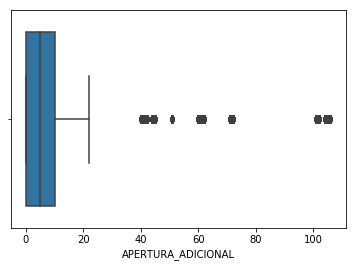

In [25]:
sns.boxplot(ventas_df["APERTURA_ADICIONAL"].astype(np.float));

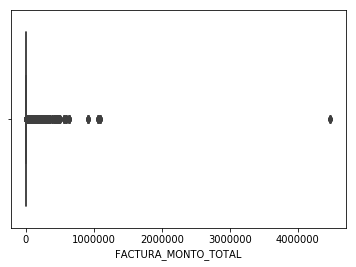

In [26]:
sns.boxplot(ventas_df["FACTURA_MONTO_TOTAL"].astype(np.float));

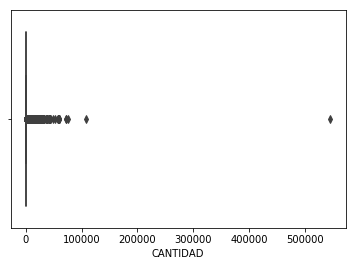

In [27]:
sns.boxplot(ventas_df["CANTIDAD"].astype(np.float));

#### En esos boxplots podemos advertir que existen puntos muy alejados de la media, y son malos porque "ensucian" el dataset. Pueden ser errores en la carga de datos, o datos que pertenecen a otra población, por lo que procederemos a quitarlos. Hay varias tecnicas para quitar outliers, como sacar las que se alejen por mas de tres desviaciones standar. O las que superen un valor dado.

In [34]:
outliers_cantidad = ventas_df[ventas_df.CANTIDAD > 50000]
# ahora los removemos del dataset original
ventas_df = ventas_df.drop(outliers_cantidad.index)
outliers_monto_total = ventas_df[ventas_df.FACTURA_MONTO_TOTAL > 500000]
ventas_df = ventas_df.drop(outliers_monto_total.index)


In [41]:
outliers_apertura_adicional = ventas_df[ventas_df.APERTURA_ADICIONAL.astype(np.float) > 20]

ventas_df = ventas_df.drop(outliers_apertura_adicional.index)

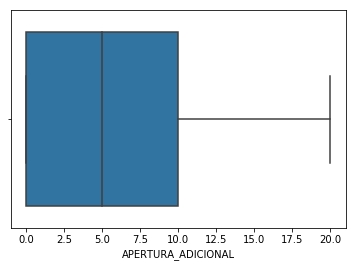

In [42]:
# volvemos a grafical los boxplots
sns.boxplot(ventas_df["APERTURA_ADICIONAL"].astype(np.float));

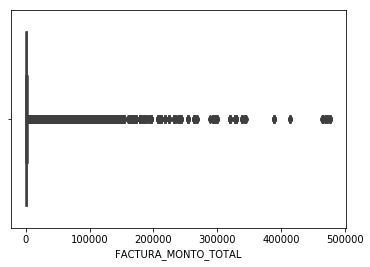

In [43]:
sns.boxplot(ventas_df["FACTURA_MONTO_TOTAL"].astype(np.float));

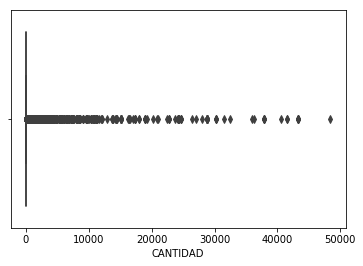

In [44]:
sns.boxplot(ventas_df["CANTIDAD"].astype(np.float));

#### Comprimir los datos y guardar el set de datos con un nombre informativo.
Leyendo sobre el funcion de pandas.Dataframe.to_csv, esta cuenta con una función para comprimir el archivo 
y cuanta con varios metodos de compresion, nosotros elegimos gzip

In [ ]:
pd.DataFrame.to_csv(ventas_df, compression='gzip')